In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [20]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(df[['Age','Fare']],df['Survived'],test_size = 0.3,random_state=0)

In [22]:
X_train.shape,X_test.shape

((623, 2), (268, 2))

Scalling the data

In [14]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)
scaler.mean_

array([29.91533865, 32.45827255])

In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled

array([[ 1.45486334, -0.12253019],
       [ 1.31686128,  0.91812372],
       [-1.99518813,  0.29950338],
       ...,
       [        nan, -0.51276504],
       [ 0.4198479 , -0.31228976],
       [ 2.0758726 ,  0.13566725]], shape=(623, 2))

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
X_train_scaled.describe()

,Age,Fare
count,5.020000e+02,6.230000e+02
mean,-3.361631e-17,5.417461e-17
std,1.000998e+00,1.000804e+00
min,-2.017958e+00,-6.731440e-01
25%,-6.151675e-01,-5.087894e-01
50%,-6.315931e-02,-3.620628e-01
75%,5.578500e-01,-2.220648e-02
max,3.455893e+00,9.951923e+00


In [30]:
np.round(X_train.describe(),1)

,Age,Fare
count,502.0,623.0
mean,29.9,32.5
std,14.5,48.3
min,0.7,0.0
25%,21.0,7.9
50%,29.0,15.0
75%,38.0,31.4
max,80.0,512.3


In [31]:
np.round(X_train_scaled.describe(),1)

,Age,Fare
count,502.0,623.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.0,-0.7
25%,-0.6,-0.5
50%,-0.1,-0.4
75%,0.6,-0.0
max,3.5,10.0


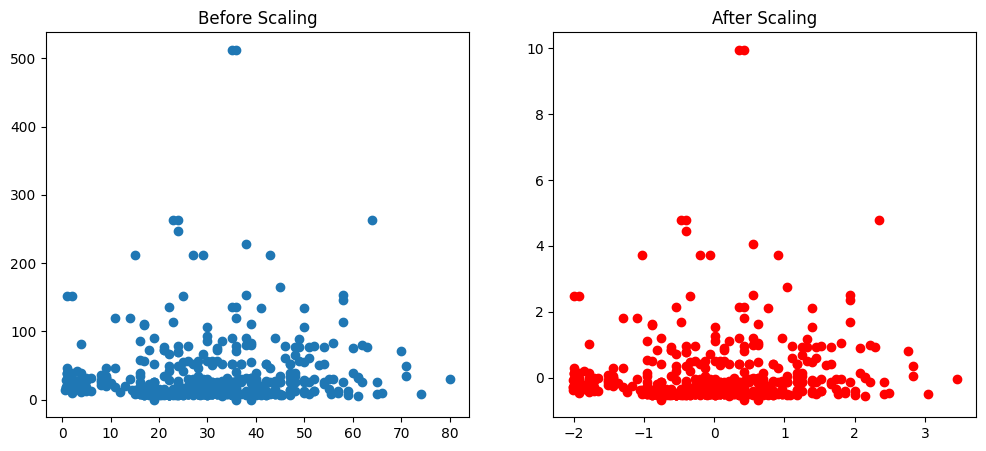

In [32]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
ax1.scatter(X_train['Age'],X_train['Fare'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['Fare'],color='red')
ax2.set_title('After Scaling')
plt.show()

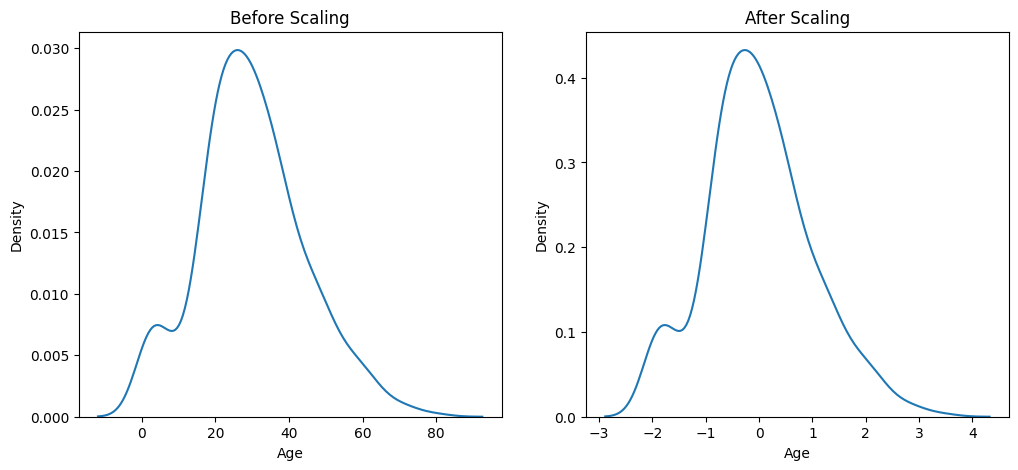

In [35]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

#before scalling probability density function
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
#sns.kdeplot(X_train['Fare'],ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
#sns.kdeplot(X_train_scaled['Fare'],ax=ax2)

plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()
lr_scalled = LogisticRegression()

In [38]:
lr.fit(X_train,Y_train)
lr_scalled.fit(X_train_scaled,Y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values